In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

#define directories
rpaper = r'G:\My Drive\Documents\PhD\Modelling\_RiceBall' #ricepaper should be in this directory
rundir = r'G:\My Drive\Documents\PhD\Modelling\_RiceBall\ricepaper\_sandbox' #directory to write output too
os.chdir(rpaper)

In [2]:
#import ricepaper classes
from ricepaper import RicePaper

In [3]:
#create ricepaper model
R = RicePaper("ThreeParticle")

In [4]:
#define numerical properties
R.setDamping(viscous_fraction=0.01) #1% of velocity is attenuated in each step. Helps model converge faster
R.setBounds(1000,1000,150)
tstep = 0.005
R.setNumericalProperties(timestep=tstep)
R.setGravity((0,-9.8,0)) #set gravity

In [5]:
#define material properties
R.setRadius(1,60)
R.setDensity(1,2500)
R.setHertzian(1,2.9e9,0.2)
R.setLinItc(1,1,2e10,2e10)
R.setFrictionItc(1,1,0.3)

In [6]:
#generate base particles
R.addBall(435,100,60,1,1)
R.addBall(565,100,60,1,1)
R.fixDOFAll(True,True,True) #fix position & rotation

#generate dynamic particle
R.addBall(450,250,60,1,1) #slightly offcenter so we get rolling

In [7]:
#cycle
steps = []
for n in range(80):
    steps.append(R.cycle(1)) #cycle for 1 second 
success = R.execute(suppress=False)   

RiceBall execution finished in 0.06 minutes.


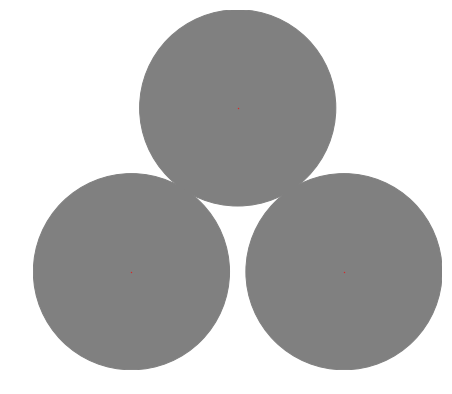

In [8]:
#plot final state
R.loadLastOutput().quickPlot()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


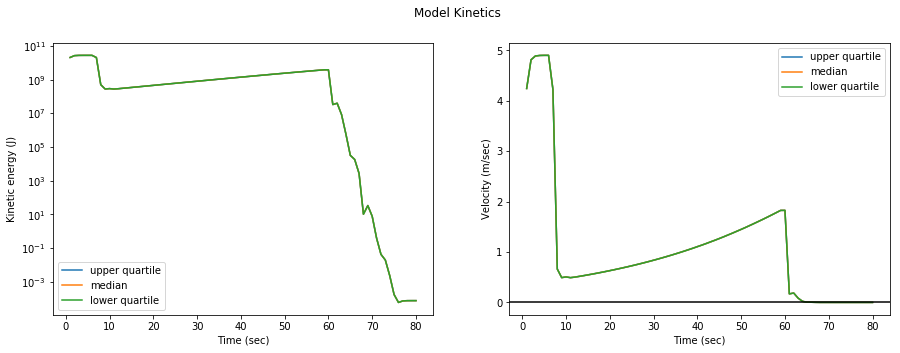

In [9]:
#plot model kinetics to check model has reached stability
fig,ax = R.plotKinetics(steps)

In [10]:
#get forces and acceleration of dynamic particle through time
ft = []
at = []
mt = []
M = R.loadSteps(steps)
for m in M:
    pid,F,moment,acc = m.getAttributes(["force","torque","acc"],ignoreFixed=True,gravity=np.array([0,-9.8,0]))
    ft.append(np.sum(F[0],axis=0))
    at.append(acc[0])
    mt.append(np.sum(moment[0],axis=0))
ft = np.array(ft)
at = np.array(at)
mt = np.array(mt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


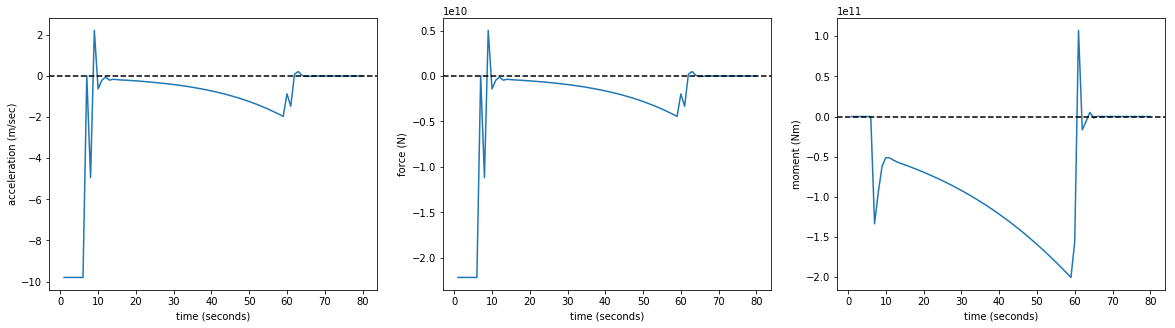

In [11]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(R.getTimeAt(steps),at[:,1])
ax[0].set_xlabel("time (seconds)")
ax[0].set_ylabel("acceleration (m/sec)")
ax[0].axhline(0,color='k',linestyle='--')

ax[1].plot(R.getTimeAt(steps),ft[:,1])
ax[1].set_xlabel("time (seconds)")
ax[1].set_ylabel("force (N)")
ax[1].axhline(0,color='k',linestyle='--')

ax[2].plot(R.getTimeAt(steps),mt[:,2])
ax[2].set_xlabel("time (seconds)")
ax[2].set_ylabel("moment (Nm)")
ax[2].axhline(0,color='k',linestyle='--')

fig.show()